### Instructions

1. Import the necessary libraries.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
from helper_functions import separate_continous_discrete, print_correlation_matrix, plot_discrete_variables, plot_continuous_variables, plot_outliers, remove_outlier_iqr, remove_outlier_cutoff_between

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('../we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

In [3]:
display(customer_df.shape)
display(customer_df.head())
display(customer_df.info())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [4]:
customer_df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)
# check 
customer_df.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


5. Change effective to date column to datetime format.

In [5]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
# check 
customer_df['effective_to_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


/var/folders/pr/f4jl4tln3yn9fd_1yjrwwkp40000gn/T/ipykernel_44462/1359624337.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

In [6]:
numerical_df = customer_df.select_dtypes(include='number').copy()

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [7]:
# check unique values, see where to set the threshhold 
numerical_df.apply(lambda x: x.nunique())

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [8]:
# function in helper_functions.py
continuous_df, discrete_df = separate_continous_discrete(numerical_df, 210)
# check
print("Continuous Variables:", continuous_df)
print("Discrete Variables:", discrete_df)

Continuous Variables: ['customer_lifetime_value', 'income', 'total_claim_amount']
Discrete Variables: ['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


8. Plot a correlation matrix, comment what you see.

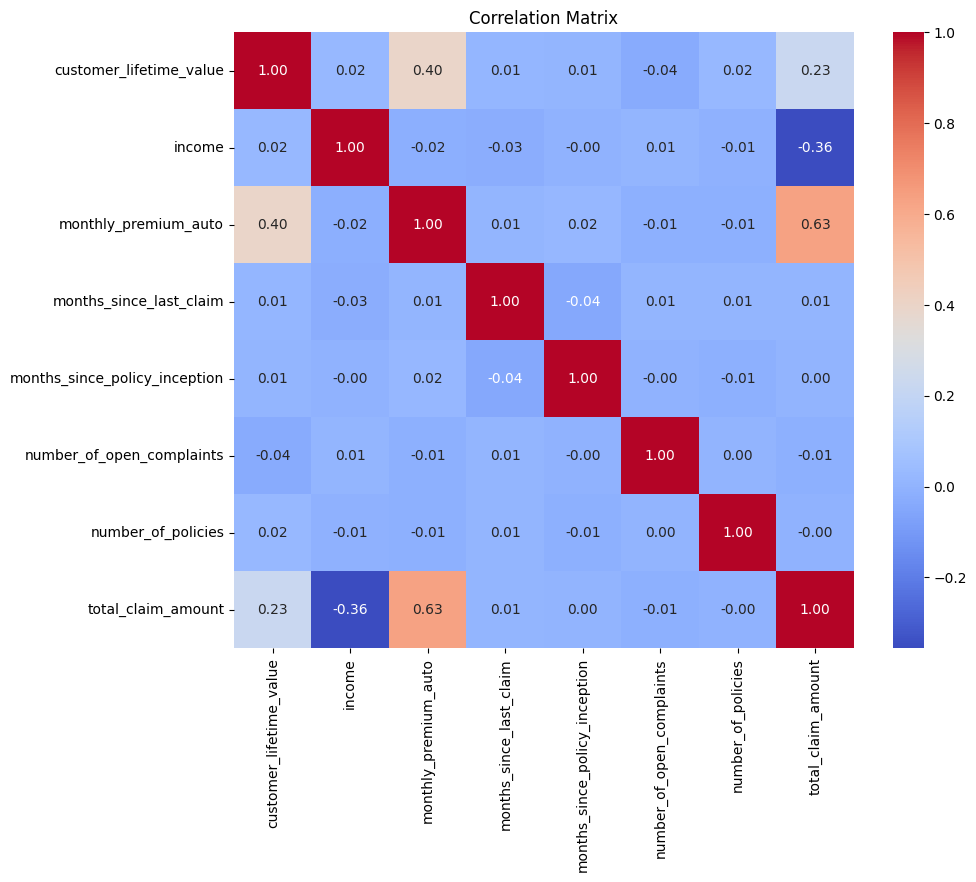

In [9]:
print_correlation_matrix(numerical_df)

- little no none (literally) correlation between our target total_claim_amount and the discrete variables (mostly)
- strongest correlation with monthly_premium_auto (+0.63) 
- second strongest is a negative correlation with income (-0.36)

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

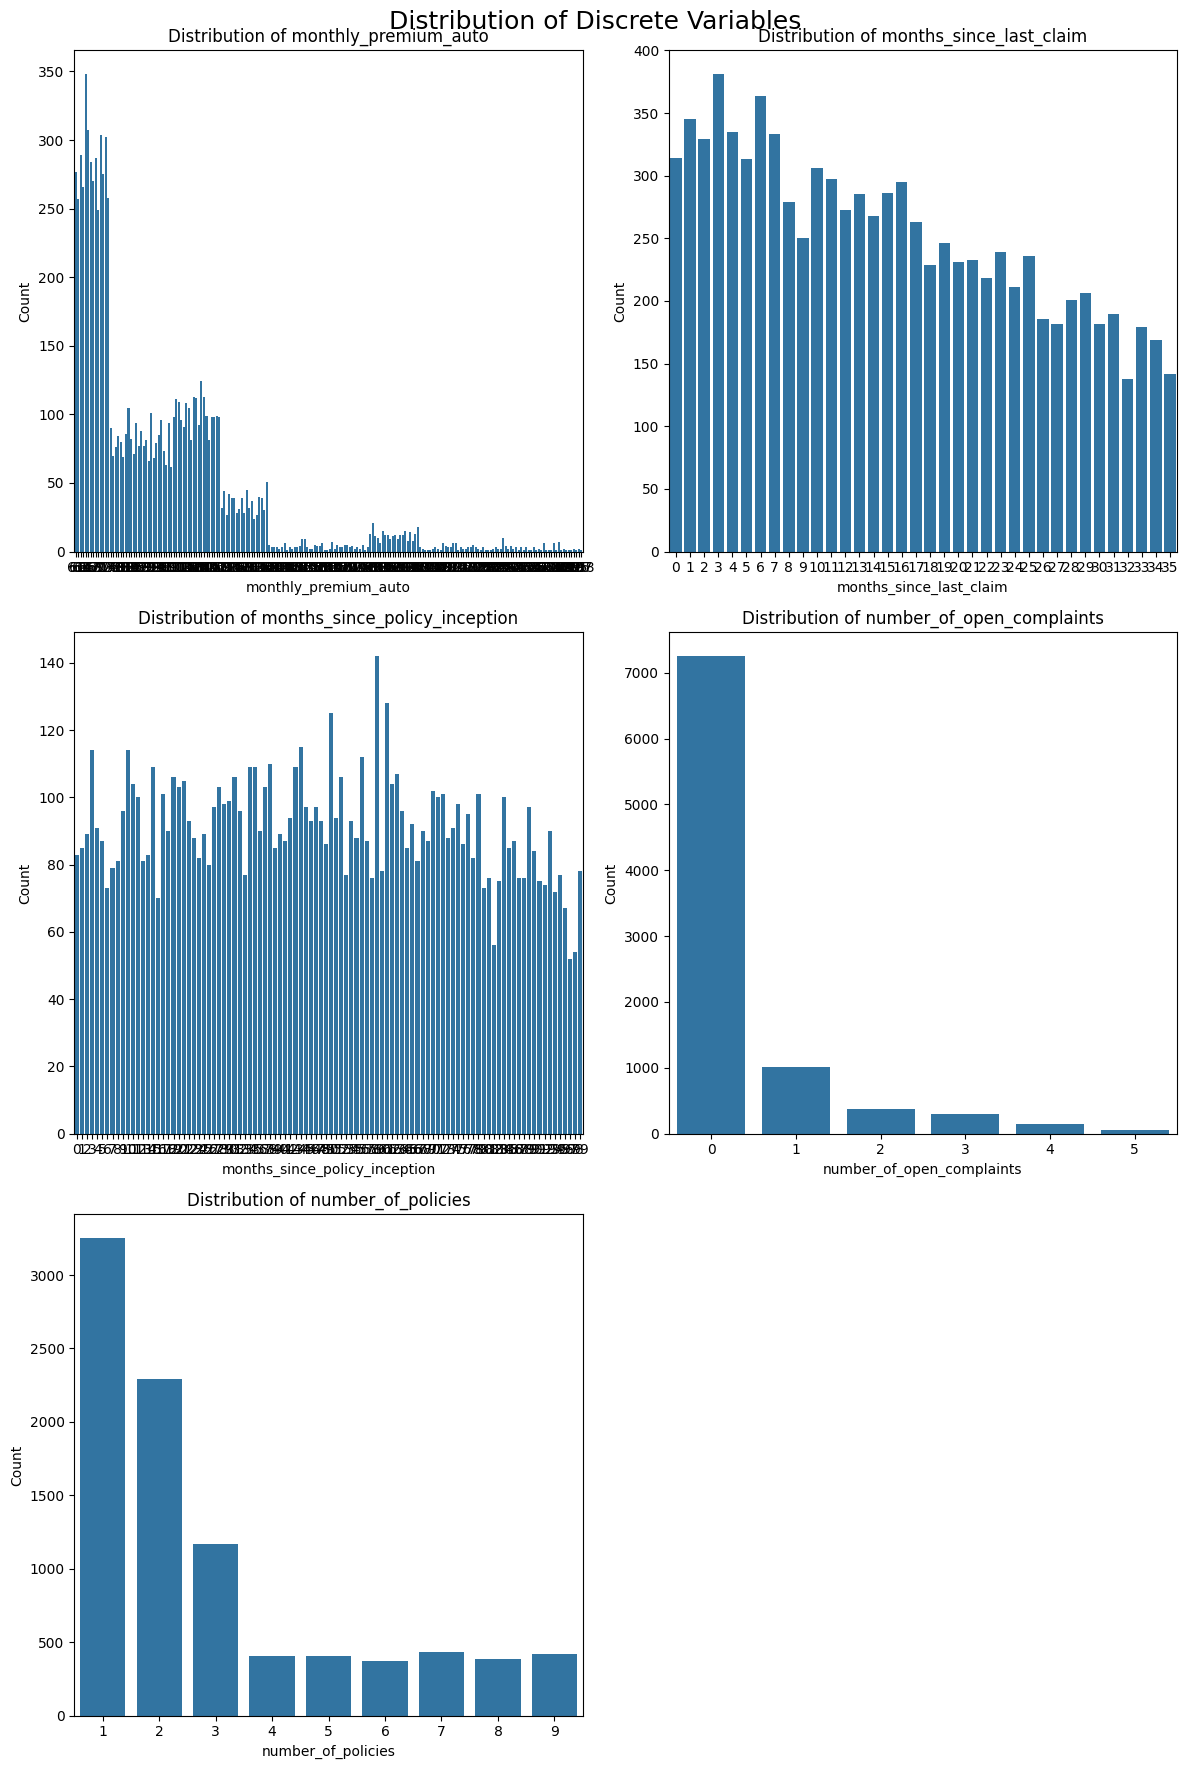

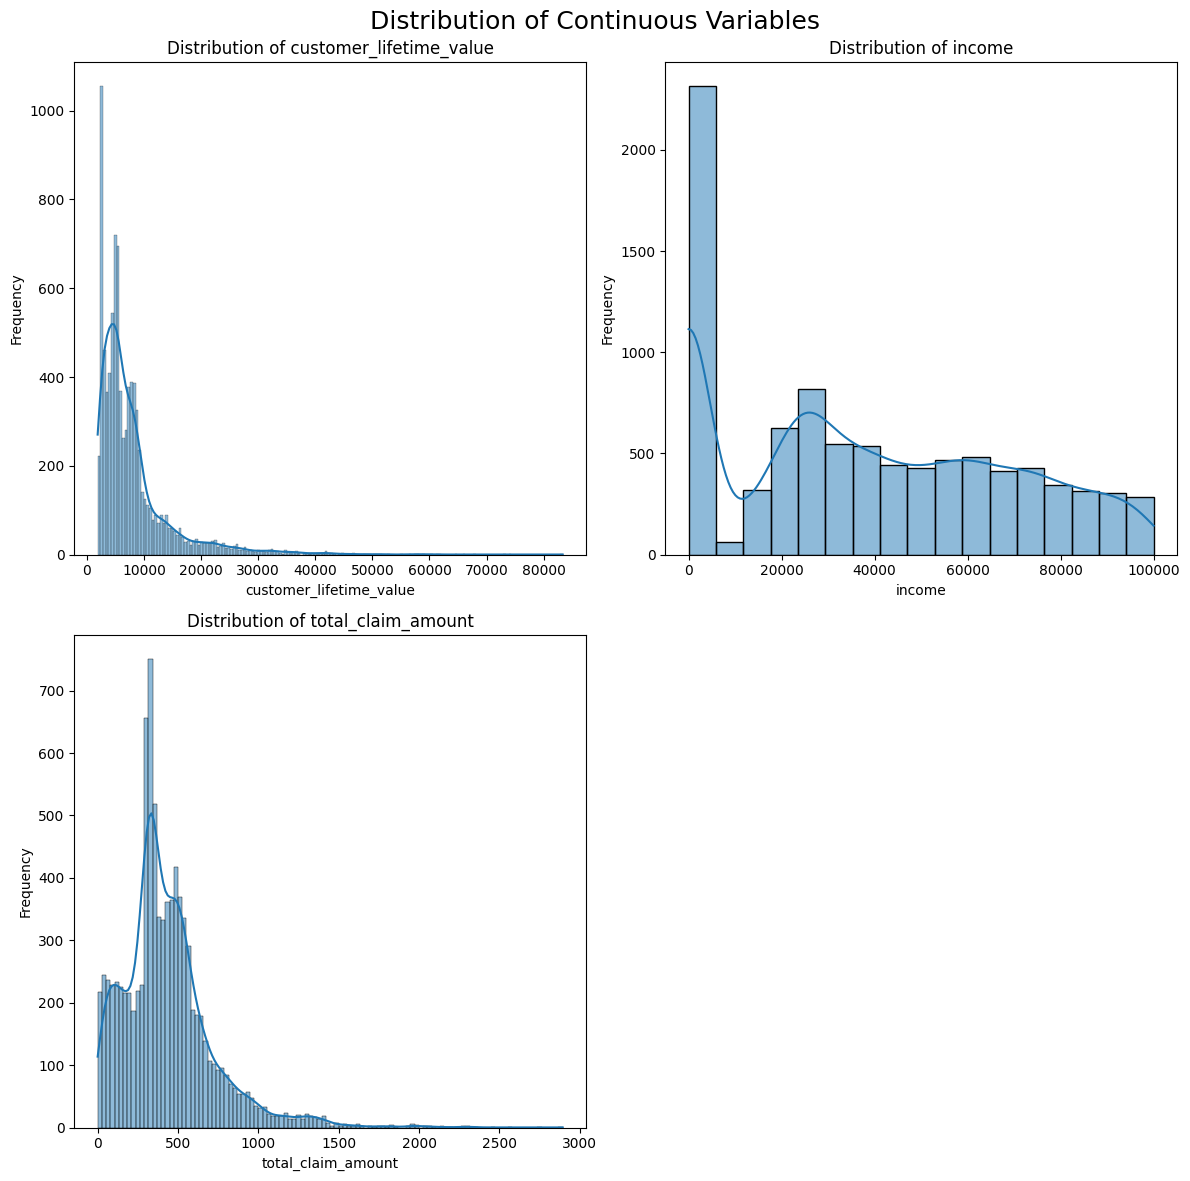

In [10]:
plot_discrete_variables(numerical_df, discrete_df)
plot_continuous_variables(numerical_df, continuous_df)

10. Comment what you can see in the plots.

**Discrete**
- monthly_premium_auto, number_of_open_complaints and number_of_policies have a very similar distribution (where it's heaver on the lower end)
- months_since_last_claim: count is decreasing with increasing number of months past-- more customers that claim more frequently 
- months_since_policy_inception: pretty stable, slowly increasing with time

**Continuous**
- customer_life_time_value and total_claim_amount are rigth skewed 
- income has a peak at 0, outlier/has nan been replaced with 0?

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

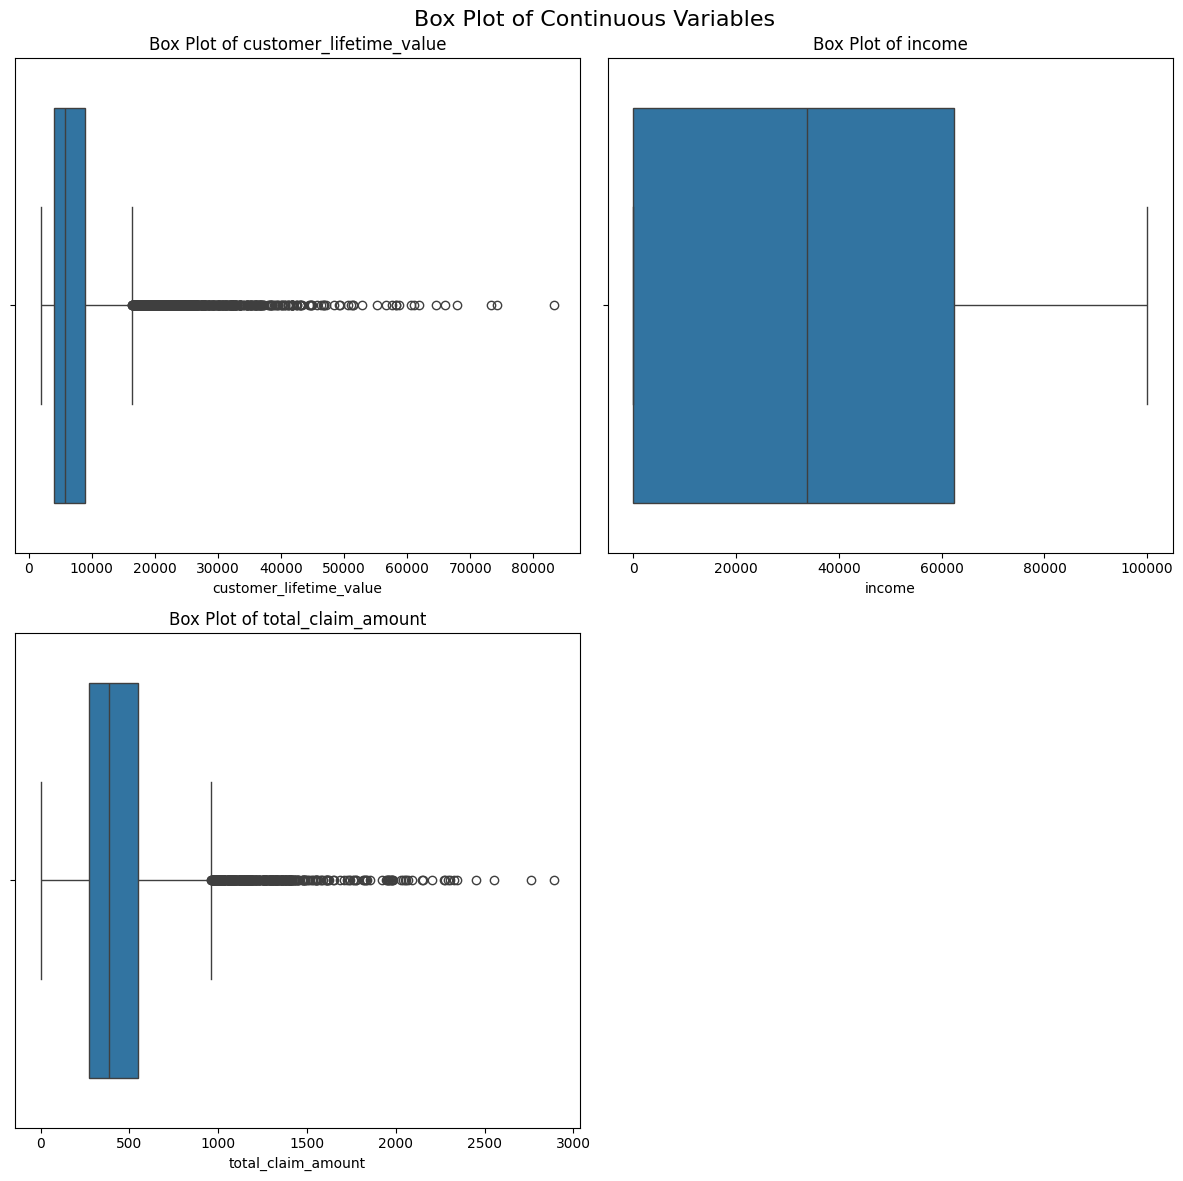

In [11]:
plot_outliers(numerical_df, continuous_df)

12. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

> customer_lifetime_value and total_claim_amount have outliers -- will remove the outiers using the IQR approach

/var/folders/pr/f4jl4tln3yn9fd_1yjrwwkp40000gn/T/ipykernel_44462/2638148881.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  numerical_df = customer_df[~(outliers_clv)]


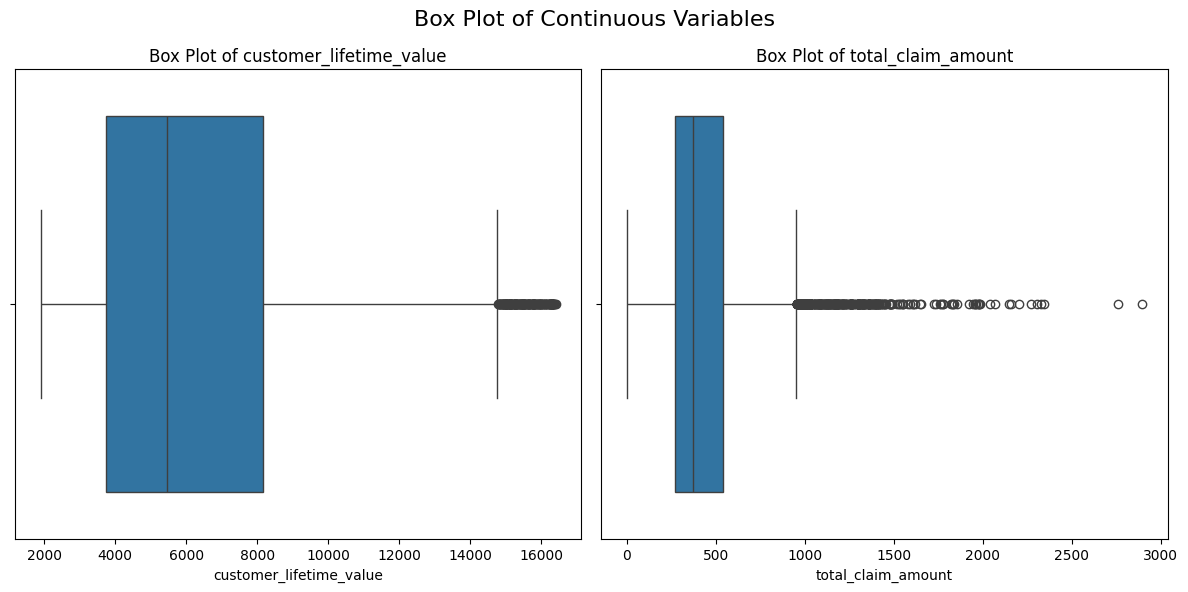

In [12]:
outliers_clv = remove_outlier_iqr(numerical_df,'customer_lifetime_value')

customer_df = customer_df[~(outliers_clv)]
numerical_df = customer_df[~(outliers_clv)]

# check again
plot_outliers(customer_df, ['customer_lifetime_value', 'total_claim_amount'])

In [13]:
customer_df.shape

(8317, 24)

/var/folders/pr/f4jl4tln3yn9fd_1yjrwwkp40000gn/T/ipykernel_44462/4127913860.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  numerical_df = customer_df[~(outliers_claim)]


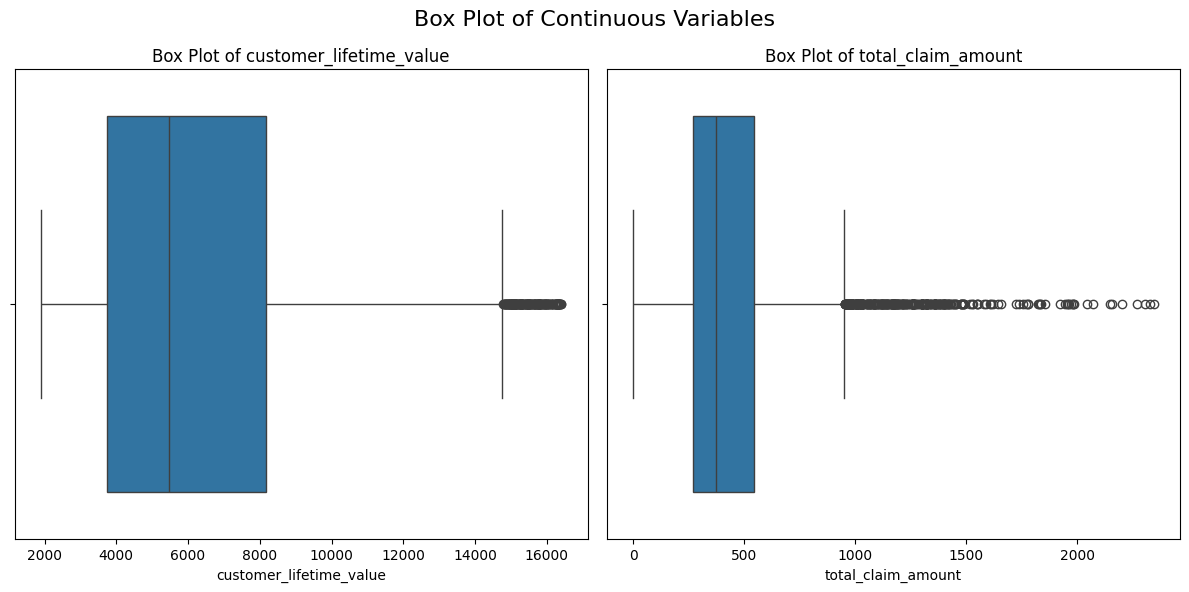

In [14]:
outliers_claim = ((numerical_df['total_claim_amount'] > 2500))

customer_df = customer_df[~(outliers_claim)]
numerical_df = customer_df[~(outliers_claim)]

# check again
plot_outliers(customer_df, ['customer_lifetime_value', 'total_claim_amount'])

*because of the strong correlation to the target value I am also removing the outliers from monthly_premium_auto*

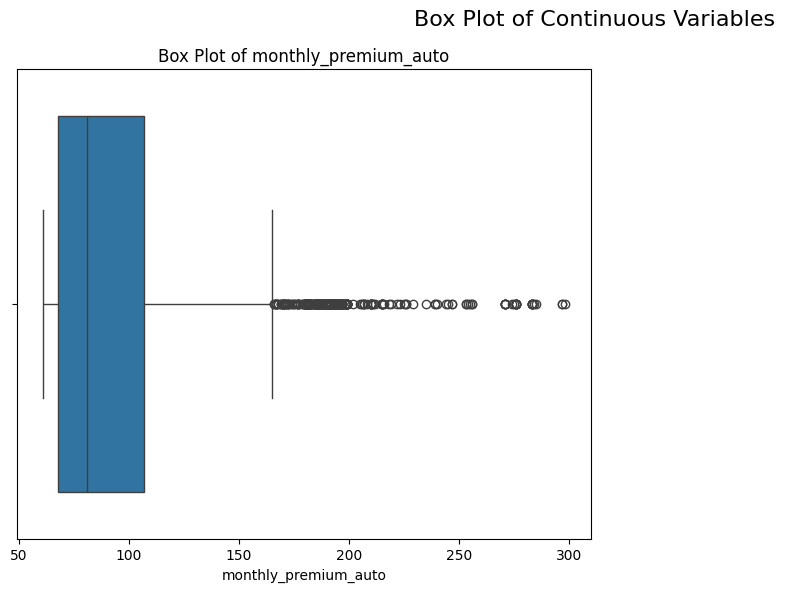

In [15]:
plot_outliers(customer_df, ['monthly_premium_auto'])

In [16]:
## remove the outliers after the obvious 250 gap, befor 270
outliers_premium = remove_outlier_cutoff_between(numerical_df, 'monthly_premium_auto', 250, 270)

customer_df = customer_df[~(outliers_premium)]
numerical_df = customer_df[~(outliers_premium)]

256


/var/folders/pr/f4jl4tln3yn9fd_1yjrwwkp40000gn/T/ipykernel_44462/1116446507.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  numerical_df = customer_df[~(outliers_premium)]


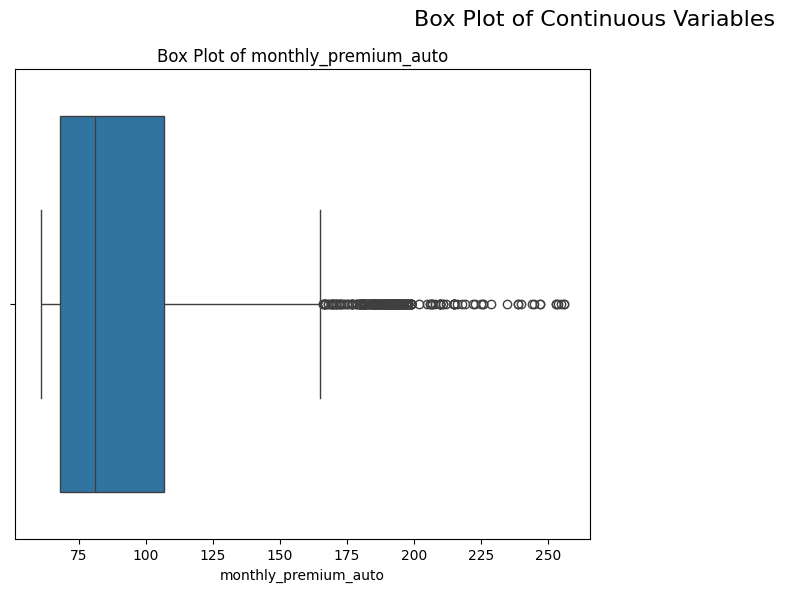

In [17]:
plot_outliers(customer_df, ['monthly_premium_auto'])

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [18]:
customer_df.isna().sum().sum()

0

> there are no nan values 

14. Save the numerical_df to csv as numerical.csv   You will use this file again this week.

In [19]:
# check shape to make sure we removed the outliers
numerical_df.shape

(8290, 24)

In [20]:
numerical_df = numerical_df.select_dtypes(include=['int64', 'float64'])


In [21]:
customer_df.shape

(8290, 24)

In [22]:
numerical_df.to_csv('numerical.csv', index=False)
customer_df.to_csv('customer.csv', index=False)

### taking a closer look at 'income'
> I have noticed that there a many 0 values, which does not seem to be accurate as someone with 0 income cannot afford car + insurance ;) 
> I am guessing that these are values that are put in bc customers did not want to share their income, so they put 0 or nothing 
> Since there a no nan values I'm suspecting the 0 used to be nan, therefore I'm treating it as such

In [23]:
numerical_df['income'].isna().sum()

0

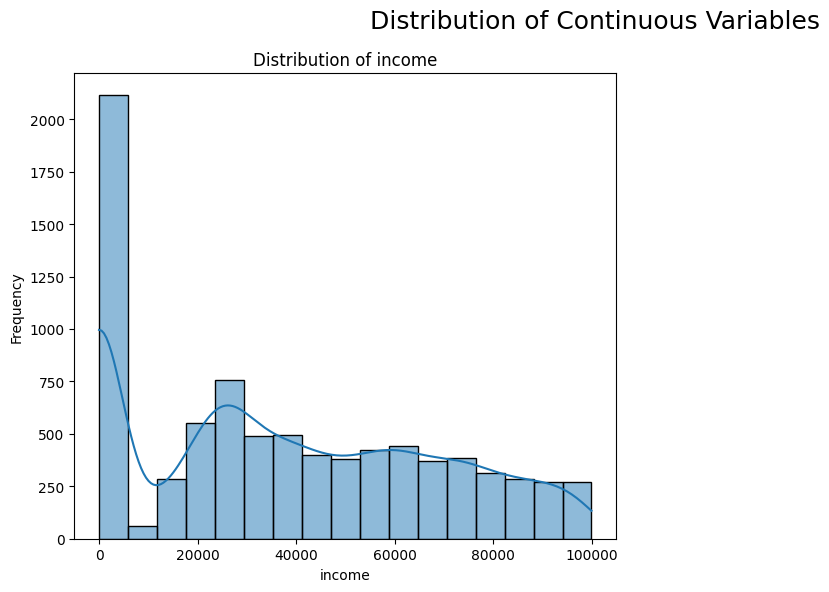

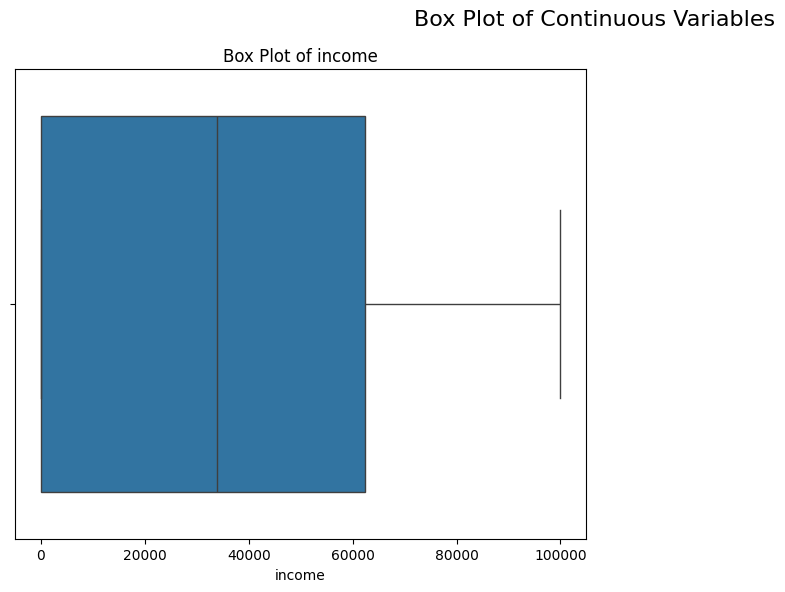

In [24]:
plot_continuous_variables(numerical_df, ['income'])
plot_outliers(numerical_df, ['income'])

In [25]:
print('Number of rows where income is 0: ', len(numerical_df[numerical_df['income'] == 0]))
print('Mean income: ', numerical_df['income'].mean())

Number of rows where income is 0:  2113
Mean income:  37649.86019300362


*Since the mean is scewed to much, I am not using that to relace the values*

In [26]:
print('Mean without 0 values ', numerical_df[numerical_df['income'] != 0]['income'].mean())

Mean without 0 values  50528.95272786142


*The mean without taking into account the 0's looks different,.... still trying to fill nan values using linear regression*